### Problem Statement

What is Workathon?

Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team. In other words, A workcation (sometimes written as workation) is a type of vacation where employees work remotely from a different location, such as a vacation rental, hotel, or even their own home.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to **predict the price per person for your next workstation trip.** The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the Dataset
train = pd.read_csv("~/Downloads/Talent/train.csv")
test = pd.read_csv("~/Downloads/Talent/test.csv")
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [4]:
# Combine the Dataset
combined = pd.concat([train, test], ignore_index = False)

train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [6]:
# Split the Date Component into Date, Month and Year
combined["Travel Date"] = pd.to_datetime(combined["Travel Date"], 
                                         dayfirst = True)

In [7]:
combined["Day"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

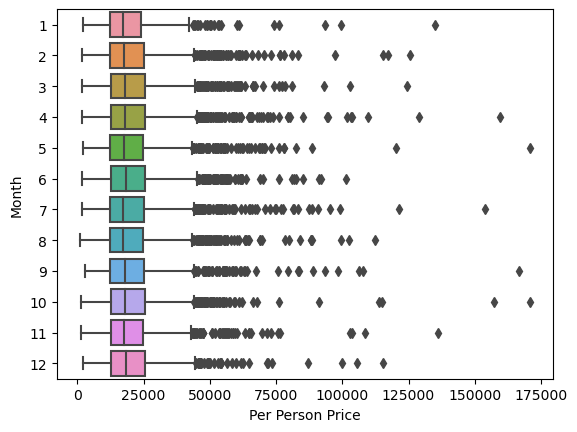

In [25]:
sns.boxplot(y = "Month", x  ="Per Person Price", 
            data = combined, orient = "h")
plt.show()

# Jan, April, may, July, Sept, Oct and Nov 

In [8]:
# Jan, April, may, July, Sept, Oct and Nov

combined["Season"]=  combined.Month.apply(lambda x:"Peak_Month" \
                     if x in [1, 4, 5, 7, 9, 10, 11]
                    else "Normal")

<AxesSubplot:xlabel='Season', ylabel='Per Person Price'>

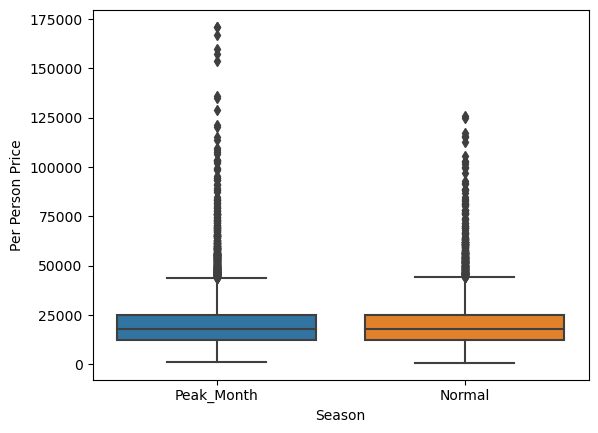

In [28]:
sns.boxplot(x = "Season", 
            y = "Per Person Price", 
            data = combined)

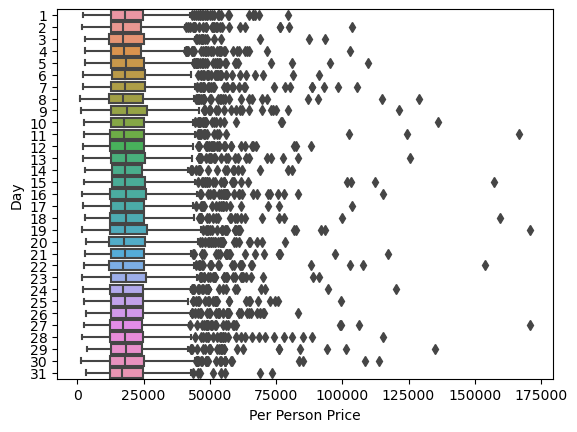

In [29]:
sns.boxplot(y = "Day", x  ="Per Person Price", 
            data = combined, orient = "h")
plt.show() # 5, 8, 10, 11, 15, 18, 19, 27, 29 and 30

In [9]:
# Jan, April, may, July, Sept, Oct and Nov

combined["Day_Season"]=  combined.Day.apply(lambda x:"Peak_Days" \
                     if x in [5, 8, 10, 11, 15, 
                              18, 19, 27, 29, 30]
                    else "Normal_Days")

<AxesSubplot:xlabel='Day_Season', ylabel='Per Person Price'>

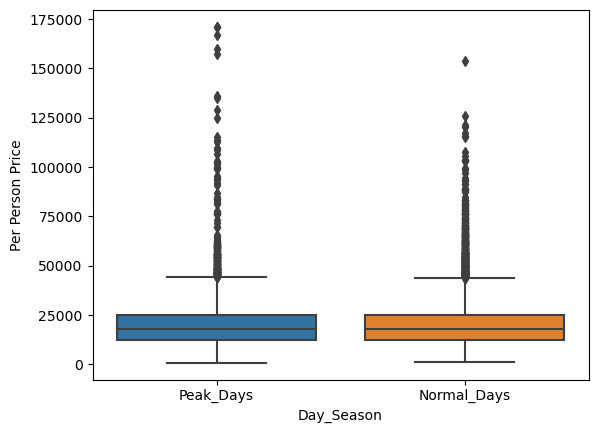

In [31]:
sns.boxplot(x = "Day_Season", 
            y = "Per Person Price", 
            data = combined)

In [32]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Day,Month,Year,Season,Day_Season
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,Peak_Month,Peak_Days


In [10]:
# Check meals and Airline...
combined["Flights"] = combined.Airline.str.split("|", 
                                                 expand = True)[0]

In [11]:
flight = combined.Flights.value_counts()[:5].index.to_list()

In [12]:
combined["Flight_Cat"] = combined.Flights.apply(lambda x:"Top5" 
                                                if x in flight 
                                                else "Others")

<AxesSubplot:xlabel='Flight_Cat', ylabel='Per Person Price'>

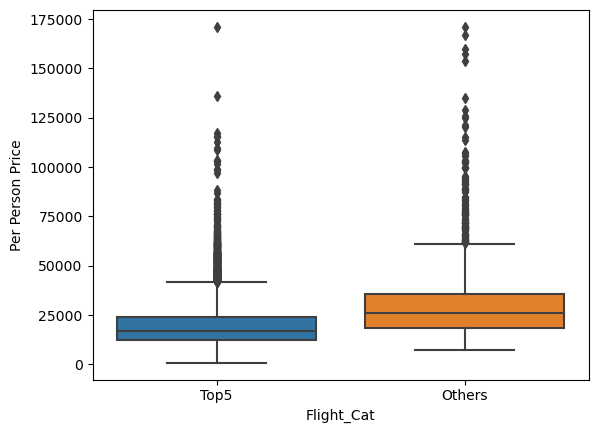

In [69]:
sns.boxplot(x = "Flight_Cat", 
            y = "Per Person Price", 
            data = combined)

In [13]:
# Places Covered
#combined["Places Covered"].str.split("|", expand = True).iloc[:,0:4]

combined["Count_Locs"]=  combined["Places Covered"].\
apply(lambda x:len(x.split("|")))

<AxesSubplot:xlabel='Meals', ylabel='Per Person Price'>

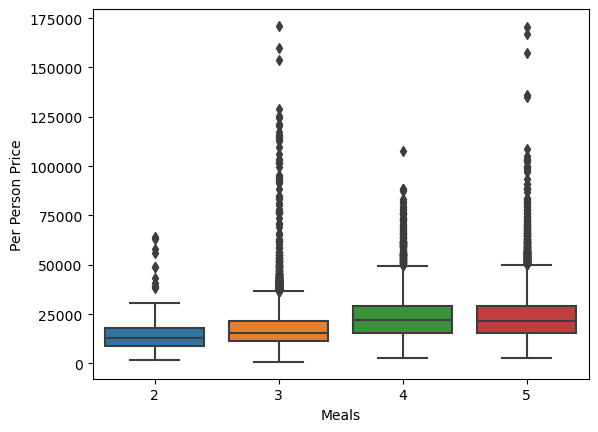

In [37]:
sns.boxplot(x = "Meals", 
            y = "Per Person Price", 
            data = combined)

In [122]:
df = pd.DataFrame(combined.Itinerary.str.split(".", expand = True)[0].str.split("", 
                                                              expand = True))

In [204]:
combined.Itinerary.str.split(".", expand = True).iloc[:, 0:4]

,0,1,2,3
0,1N New Delhi,2N Shimla,2N Manali,1N Chandigarh
1,1N Srinagar,2N Pahalgam,1N Srinagar,None
2,2N Udaipur,1N Chittorgarh,None,None
3,2N Munnar,1N Kumarakom,1N Allepey,2N Kovalam and Poovar
4,4N Pattaya,3N Bangkok,None,None
...,...,...,...,...
8995,2N Munnar,1N Thekkady,1N Allepey,None
8996,1N Srinagar,1N Pahalgam,1N Srinagar,1N Gulmarg
8997,3N Dharamshala,2N Dalhousie,None,None
8998,2N Jaipur,1N Jodhpur,2N Jaisalmer,2N Udaipur


In [187]:
count1 = localdf[0].str.split("N", expand = True)[0]
count2 = localdf[1].str.split("N", expand = True)[0]
count3 = localdf[2].str.split("N", expand = True)[0]
count4 = localdf[3].str.split("N", expand = True)[0]

In [14]:
list_m = []
for i in range(0, 11):
    saved = combined.Itinerary.str.split(".", expand = True)[i]\
    .str.split("N", expand = True)[0].\
    apply(lambda x:0 if x==None else x).astype(int)
    list_m.append(saved)

In [16]:
combined["Total_Travel_Days"] =\
pd.concat(list_m, axis = 1).sum(axis = 1)

<AxesSubplot:xlabel='Total_Travel_Days', ylabel='Per Person Price'>

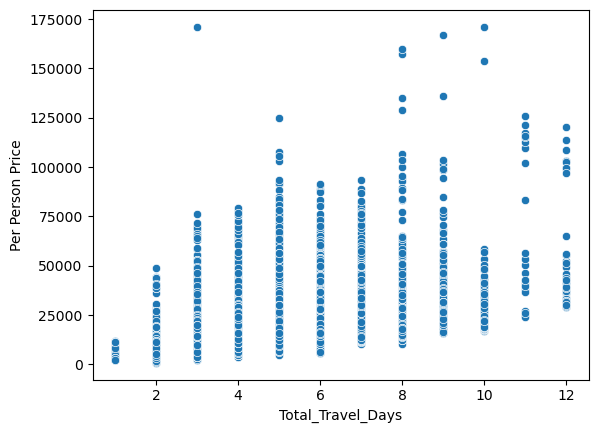

In [200]:
sns.scatterplot(x = "Total_Travel_Days", y = "Per Person Price", 
              data = combined)

In [17]:
combined.Total_Travel_Days.describe()

count    30000.000000
mean         4.722133
std          1.792381
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         14.000000
Name: Total_Travel_Days, dtype: float64

In [18]:
ratings = []
for i in range(0, 10):
    saved = combined["Hotel Details"].str.split(":", expand = True)[i].\
    str.split("|", expand = True)[0].apply(lambda x: 0 if x is None else x)
    ratings.append(saved)

In [19]:
pd.concat(ratings, ignore_index = True)

0                                             Not Available
1                                 The Orchard Retreat & Spa
2                                                The Ananta
3         Elixir Hills Suites Resort & Spa-MMT Holidays ...
4                         Dusit Thani Pattaya - MMT Special
                                ...                        
299995                                                    0
299996                                                    0
299997                                                    0
299998                                                    0
299999                                                    0
Name: 0, Length: 300000, dtype: object

In [20]:
ratings = []
for i in range(0, 10):
    ratings.append(combined["Hotel Details"].\
                   str.split("|", expand = True)\
    [i].str.split(":", expand = True)[1].\
                   apply(lambda x:0 if x is None else x))

In [21]:
combined["ratings"] = pd.concat(ratings, ignore_index = True)

In [22]:
combined.ratings.replace(to_replace = ["Four", "Three", 
                                      "Five", 'Two', 
                                      'A member of The Leading Hotels Of The World'],
                        value =["4", "3", "5", "2", "0"], inplace = True)

In [23]:
combined["ratings"]=pd.to_numeric(combined.ratings)

In [24]:
combined.ratings.fillna(0, inplace = True)

In [25]:
combined["Count_Sightseeing"] = combined["Sightseeing Places Covered"].\
apply(lambda x:0 if x =="Not Available" \
else len(x.split("|")))

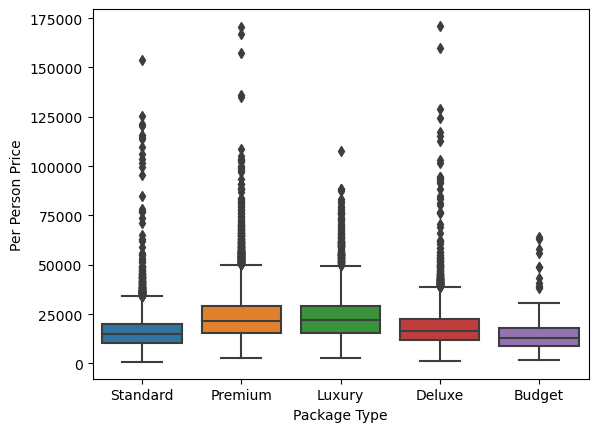

In [27]:
sns.boxplot(x = "Package Type", 
            y = "Per Person Price",
           data = combined)
plt.show()

In [29]:
combined.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [32]:
dict_ = {"Luxury": 5, "Premium": 4, 
         "Deluxe": 3, "Standard":2, "Budget":1}

combined["Package Type"] = combined["Package Type"].map(dict_)        

In [45]:
#combined["Destination"].apply(lambda x: len(x.split("|")))
# Hotel Count
combined["Hotel_Count"] = combined["Hotel Details"].\
apply(lambda x: 0 if x=="Not Available" else len(x.split("|")))

In [54]:
#combined["Cancellation Rules"].apply(lambda x: len(str(x).split())).describe()

count    30000.000000
mean       129.369367
std        137.097312
min          2.000000
25%         81.000000
50%         81.000000
75%         81.000000
max        488.000000
Name: Cancellation Rules, dtype: float64

In [102]:
newdata = combined.drop(['Uniq Id', 'Package Name',
                         'Destination', 
                         'Itinerary','Places Covered',"Flights", 
                         'Travel Date', 'Hotel Details',"Start City",
                         'Airline', 'Sightseeing Places Covered',
       'Cancellation Rules'], axis = 1)

In [103]:
newdata.shape

(30000, 15)

In [104]:
# Split the Data in Train and Test

newtrain = newdata.iloc[0:train.shape[0], :]
newtest = newdata.iloc[train.shape[0]:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((21000, 15), (9000, 15), (21000, 15), (9000, 14))

In [105]:
# Per Person Stats basis Package Type

newtrain.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
1,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
2,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0
3,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
4,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
5,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0


In [106]:
newtrain["Package_Count"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("count")

newtest["Package_Count"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("count")

newtrain["Package_Min"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("min")

newtest["Package_Min"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("min")


newtrain["Package_Max"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("max")

newtest["Package_Max"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("max")

newtrain["Package_Mean"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("mean")

newtest["Package_Mean"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("mean")

newtrain["Package_Median"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("median")

newtest["Package_Median"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("median")

In [107]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Package Type       21000 non-null  int64  
 1   Flight Stops       21000 non-null  int64  
 2   Meals              21000 non-null  int64  
 3   Per Person Price   21000 non-null  float64
 4   Day                21000 non-null  int64  
 5   Month              21000 non-null  int64  
 6   Year               21000 non-null  int64  
 7   Season             21000 non-null  object 
 8   Day_Season         21000 non-null  object 
 9   Flight_Cat         21000 non-null  object 
 10  Count_Locs         21000 non-null  int64  
 11  Total_Travel_Days  21000 non-null  int64  
 12  ratings            21000 non-null  float64
 13  Count_Sightseeing  21000 non-null  int64  
 14  Hotel_Count        21000 non-null  int64  
 15  Package_Count      21000 non-null  int64  
 16  Package_Min        210

In [108]:
newtest.drop("Per Person Price", axis = 1, inplace = True)

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

X = dummytrain.drop("Per Person Price", axis = 1)
y = dummytrain["Per Person Price"]

In [109]:
dummytrain.shape, dummytest.shape

((21000, 20), (9000, 19))

In [110]:
# Modelling

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [111]:
# Base Models

def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["DTree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    return models

In [112]:
# Function to evaluate the models...
from sklearn.model_selection import KFold, cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5, shuffle = True, random_state = 1001)
    scores = -cross_val_score(estimator = model, X = X, 
                             y = y, cv = cv,
                            scoring="neg_mean_squared_error",
                            n_jobs=-1)
    return scores
    


In [113]:
# Lets use the functions to calculate the scores...

models = base_models()

result, names = list(), list()

for name, mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name, np.mean(result))

LR 77063864.06682393
DTree 85254159.80467983
RF 73327036.22552547
GBM 69691606.17061423
XGB 65910325.23938173


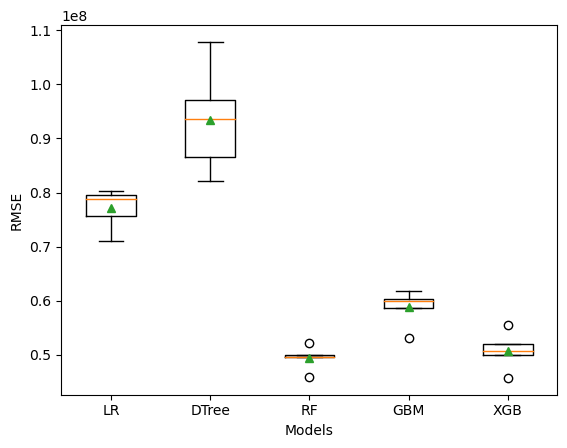

In [114]:
# Plot the results...

plt.boxplot(result, labels = names, showmeans = True)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

In [115]:
# Stacking Regressor
from sklearn.ensemble import StackingRegressor
GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()
# ('lr', RidgeCV()),('svr', LinearSVR(dual="auto", random_state=42))
stack = StackingRegressor(estimators = [('GBM', GBM), 
                                        ("RF", RF)], 
                         final_estimator=XGB,
                          cv = 5)

predictions = stack.fit(X, y).predict(dummytest)

In [117]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                               test_size = 0.20,
                                               random_state = 42)

xgb = XGBRegressor()

from sklearn.metrics import mean_squared_error

pred = xgb.fit(xtrain, ytrain).predict(xtest)

print((np.sqrt(np.log(mean_squared_error(ytest, pred)))))

4.219962924506567
